# RiskOptima

In [5]:
!pip install --upgrade riskoptima

  Attempting uninstall: riskoptima
    Found existing installation: riskoptima 1.24.0
    Uninstalling riskoptima-1.24.0:
      Successfully uninstalled riskoptima-1.24.0


In [1]:
import pandas as pd
from riskoptima import RiskOptima

import warnings
warnings.filterwarnings(
    "ignore", 
    category=FutureWarning, 
    message=".*DataFrame.std with axis=None is deprecated.*"
)

# Define your current porfolio with your weights and company names
asset_data = [
    {"Asset": "MO",    "Weight": 0.04, "Label": "Altria Group Inc.",       "MarketCap": 110.0e9},
    {"Asset": "NWN",   "Weight": 0.14, "Label": "Northwest Natural Gas",   "MarketCap": 1.8e9},
    {"Asset": "BKH",   "Weight": 0.01, "Label": "Black Hills Corp.",         "MarketCap": 4.5e9},
    {"Asset": "ED",    "Weight": 0.01, "Label": "Con Edison",                "MarketCap": 30.0e9},
    {"Asset": "PEP",   "Weight": 0.09, "Label": "PepsiCo Inc.",              "MarketCap": 255.0e9},
    {"Asset": "NFG",   "Weight": 0.16, "Label": "National Fuel Gas",         "MarketCap": 5.6e9},
    {"Asset": "KO",    "Weight": 0.06, "Label": "Coca-Cola Company",         "MarketCap": 275.0e9},
    {"Asset": "FRT",   "Weight": 0.28, "Label": "Federal Realty Inv. Trust", "MarketCap": 9.8e9},
    {"Asset": "GPC",   "Weight": 0.16, "Label": "Genuine Parts Co.",         "MarketCap": 25.3e9},
    {"Asset": "MSEX",  "Weight": 0.05, "Label": "Middlesex Water Co.",       "MarketCap": 2.4e9}
]
asset_table = pd.DataFrame(asset_data)

capital = 100_000

asset_table['Portfolio'] = asset_table['Weight'] * capital

ANALYSIS_START_DATE = RiskOptima.get_previous_year_date(RiskOptima.get_previous_working_day(), 1)
ANALYSIS_END_DATE   = RiskOptima.get_previous_working_day()
BENCHMARK_INDEX     = 'SPY'
RISK_FREE_RATE      = 0.05
NUMBER_OF_WEIGHTS   = 10_000
NUMBER_OF_MC_RUNS   = 1_000

print(asset_table)
print(RiskOptima.VERSION)

  Asset  Weight                      Label     MarketCap  Portfolio
0    MO    0.04          Altria Group Inc.  1.100000e+11     4000.0
1   NWN    0.14      Northwest Natural Gas  1.800000e+09    14000.0
2   BKH    0.01          Black Hills Corp.  4.500000e+09     1000.0
3    ED    0.01                 Con Edison  3.000000e+10     1000.0
4   PEP    0.09               PepsiCo Inc.  2.550000e+11     9000.0
5   NFG    0.16          National Fuel Gas  5.600000e+09    16000.0
6    KO    0.06          Coca-Cola Company  2.750000e+11     6000.0
7   FRT    0.28  Federal Realty Inv. Trust  9.800000e+09    28000.0
8   GPC    0.16          Genuine Parts Co.  2.530000e+10    16000.0
9  MSEX    0.05        Middlesex Water Co.  2.400000e+09     5000.0
1.25.0


## Create Portfolio Area Chart

YF.download() has changed argument auto_adjust default to True
  Asset  Close(T-2)    Close(T)  2d % Change
0    MO   60.270000   60.380001     0.182513
1   NWN   99.959999   99.919998    -0.040017
2   BKH  105.040001  104.010002    -0.980578
3    ED  122.099998  122.690002     0.483214
4   PEP   70.800003   70.870003     0.098870
5   NFG   54.849998   55.080002     0.419332
6    KO   51.799999   51.049999    -1.447876
7   FRT   73.779999   73.540001    -0.325289
8   GPC   41.759998   41.139999    -1.484672
9  MSEX  151.509995  152.020004     0.336618


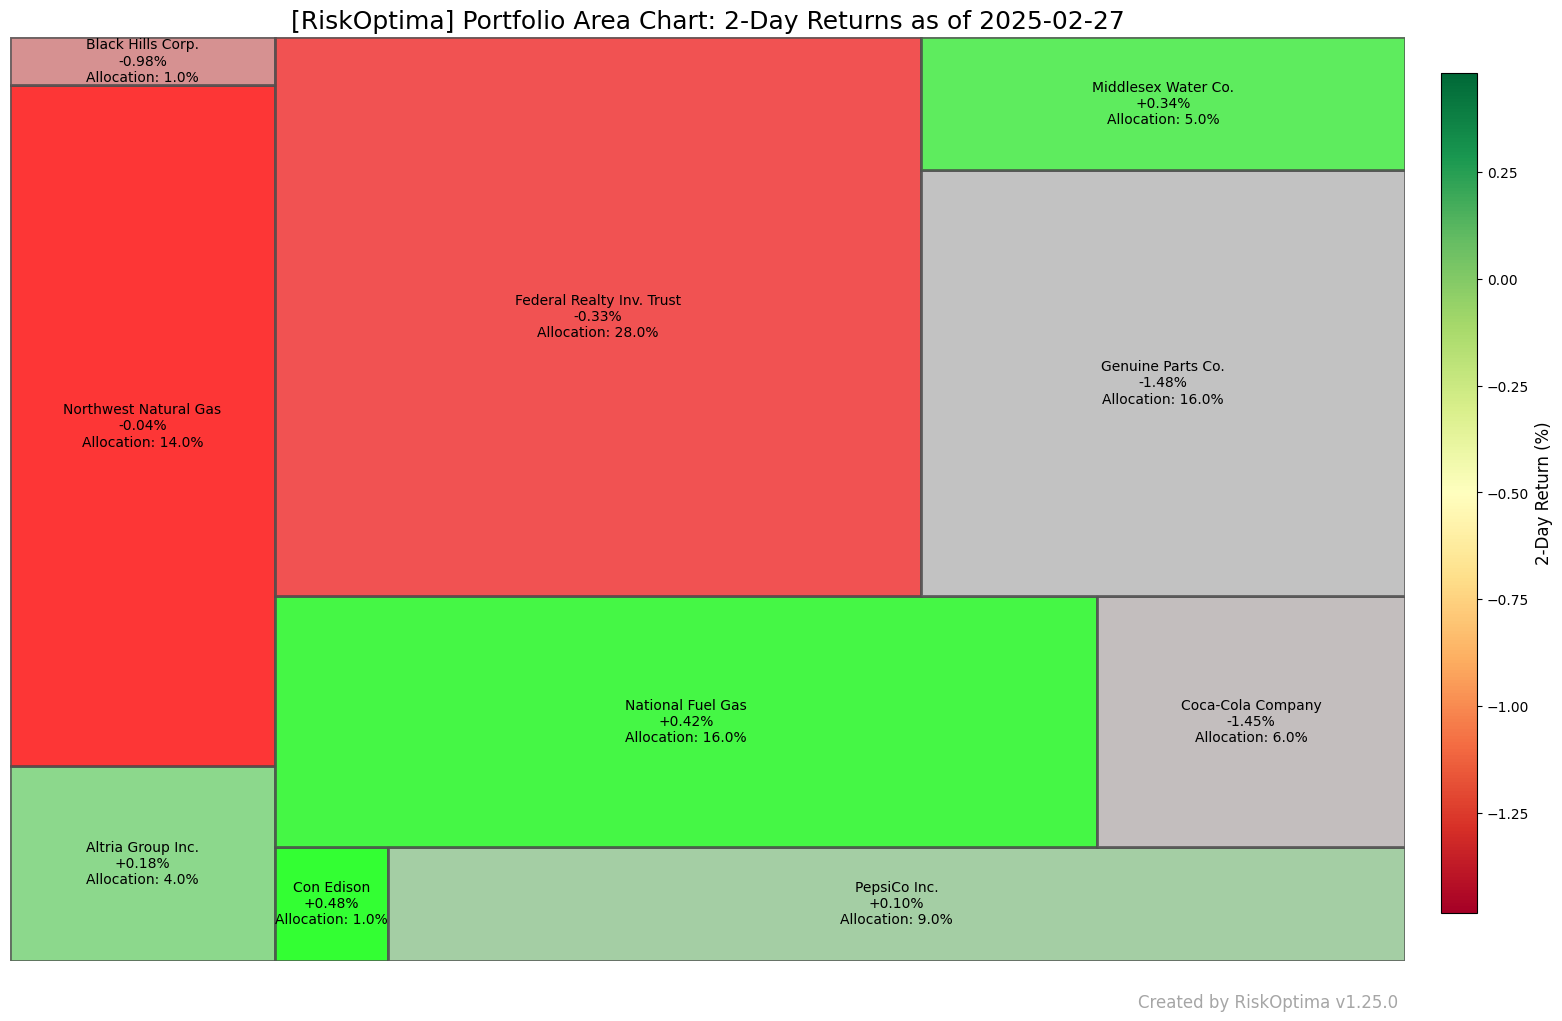

In [3]:
RiskOptima.create_portfolio_area_chart(
    asset_table,
    end_date=ANALYSIS_END_DATE,
    lookback_days=2,
    title="Portfolio Area Chart"
)

## Efficient Frontier with Monte Carlo Simulation

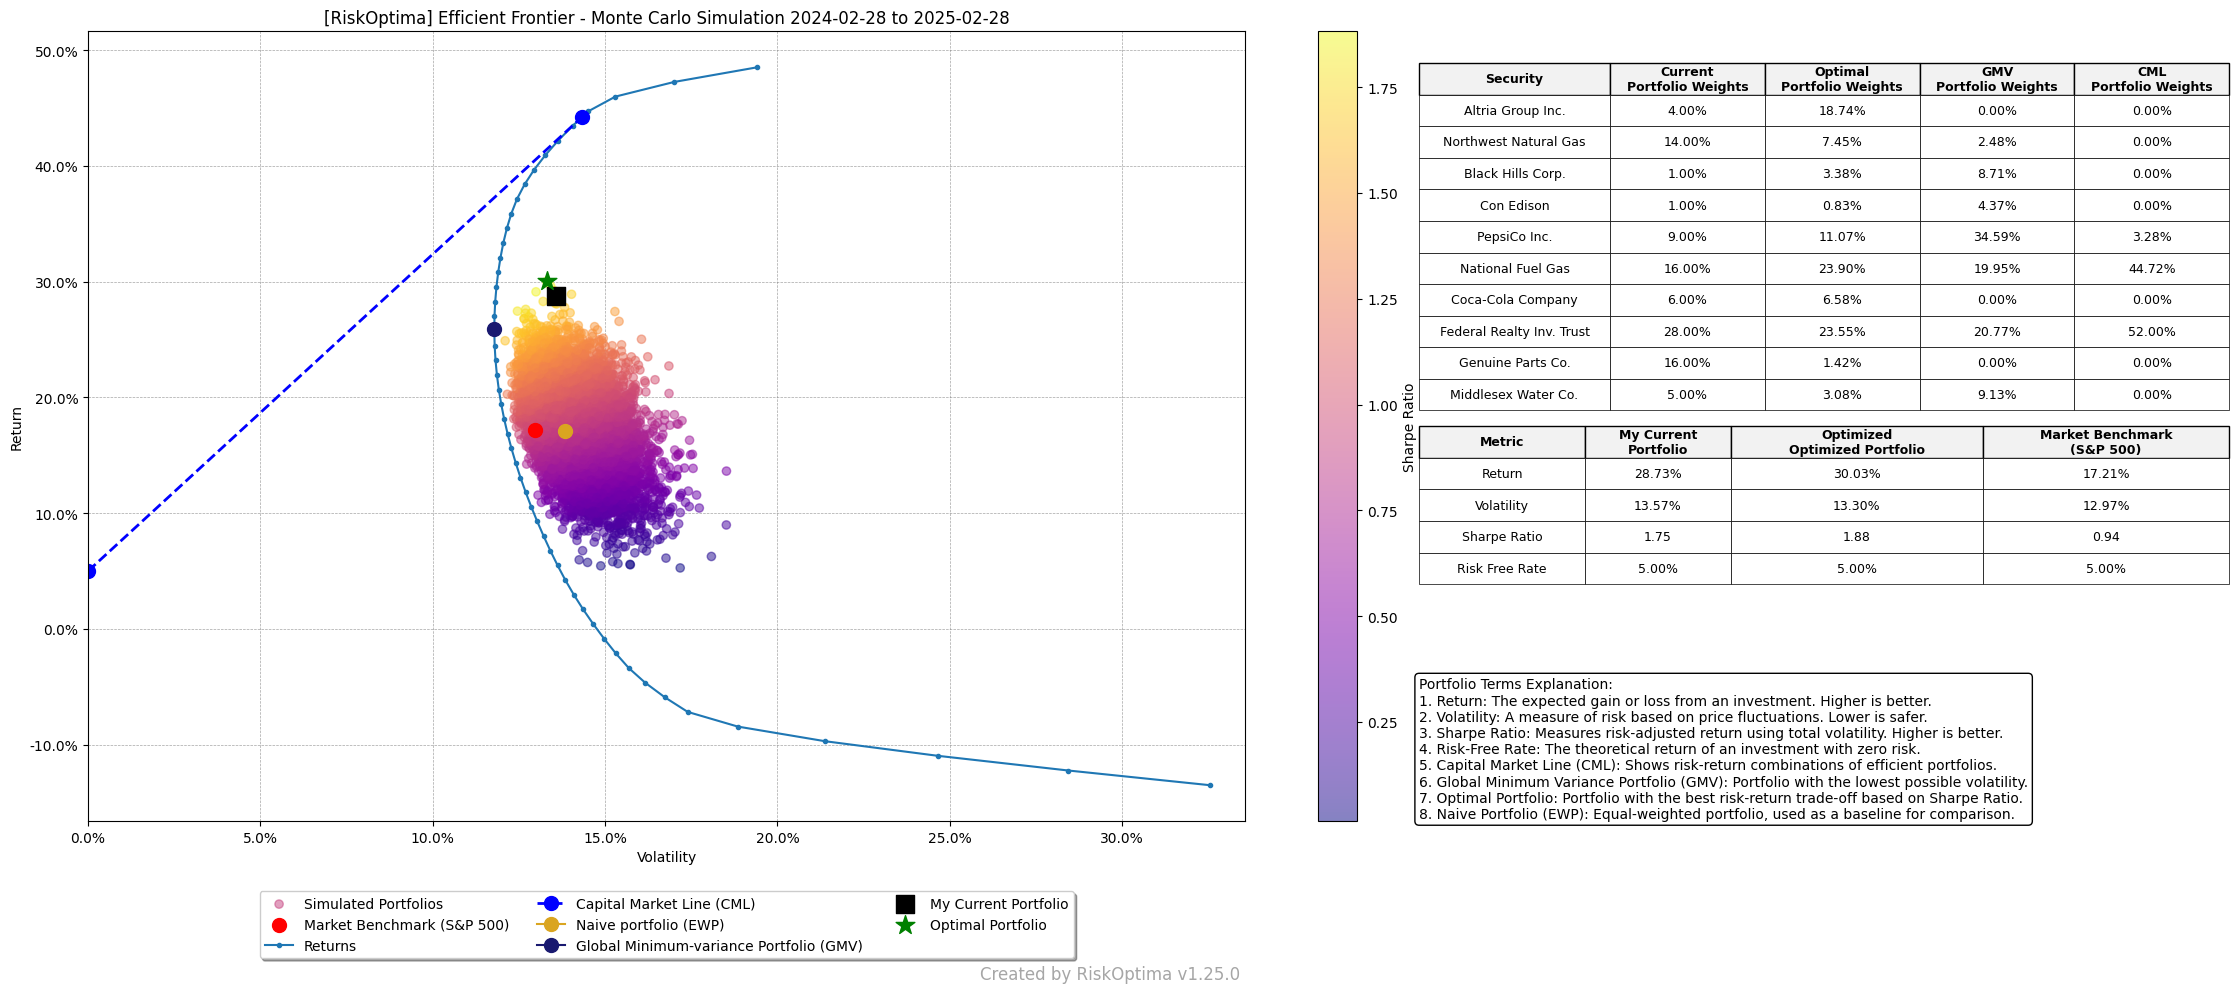

(                          Current\nPortfolio Weights  \
 Security                                               
 Altria Group Inc.                              4.00%   
 Northwest Natural Gas                         14.00%   
 Black Hills Corp.                              1.00%   
 Con Edison                                     1.00%   
 PepsiCo Inc.                                   9.00%   
 National Fuel Gas                             16.00%   
 Coca-Cola Company                              6.00%   
 Federal Realty Inv. Trust                     28.00%   
 Genuine Parts Co.                             16.00%   
 Middlesex Water Co.                            5.00%   
 
                           Optimal\nPortfolio Weights GMV\nPortfolio Weights  \
 Security                                                                      
 Altria Group Inc.                             18.74%                  0.00%   
 Northwest Natural Gas                          7.45%                  2.4

In [7]:
RiskOptima.plot_efficient_frontier_monte_carlo(
    asset_table,
    start_date=ANALYSIS_START_DATE,
    end_date=ANALYSIS_END_DATE,
    risk_free_rate=RISK_FREE_RATE,
    num_portfolios=NUMBER_OF_WEIGHTS,
    market_benchmark=BENCHMARK_INDEX,
    set_ticks=False,
    x_pos_table=1.15,    # Position for the weight table on the plot
    y_pos_table=0.52,    # Position for the weight table on the plot
)

## Portfolio Optimization using Mean Variance and Machine Learning

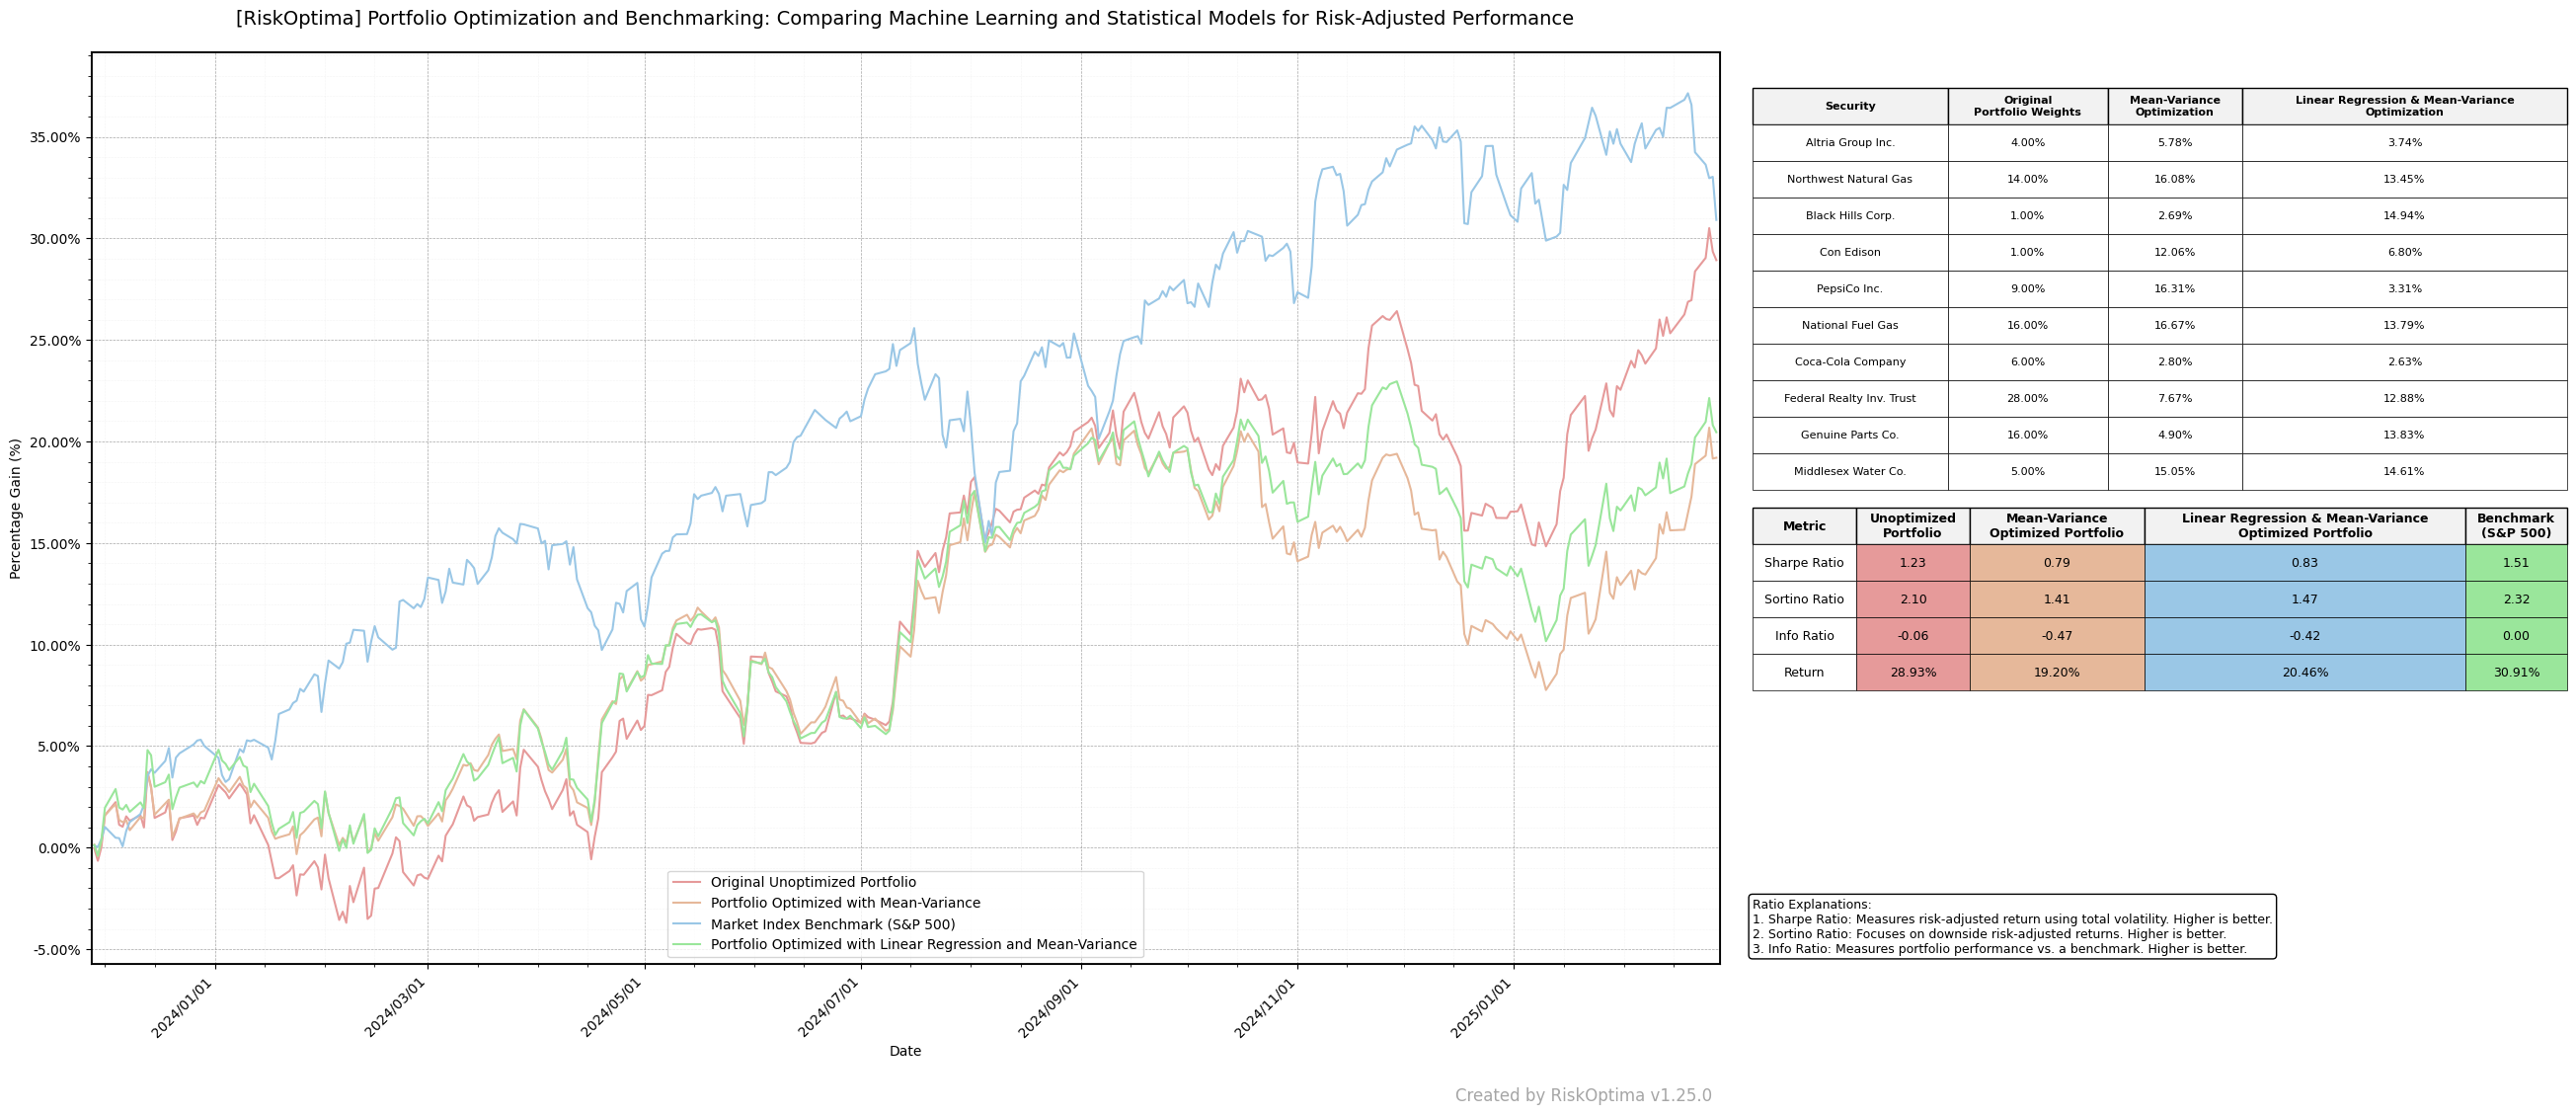

In [9]:
RiskOptima.run_portfolio_optimization_mv_ml(
    asset_table=asset_table,
    training_start_date='2022-01-01',
    training_end_date='2023-11-27',
    model_type='Linear Regression',    
    risk_free_rate=RISK_FREE_RATE,
    num_portfolios=100000,
    market_benchmark=[BENCHMARK_INDEX],
    max_volatility=0.25,
    min_weight=0.03,
    max_weight=0.2
)

## Portfolio Optimization using Probability Analysis

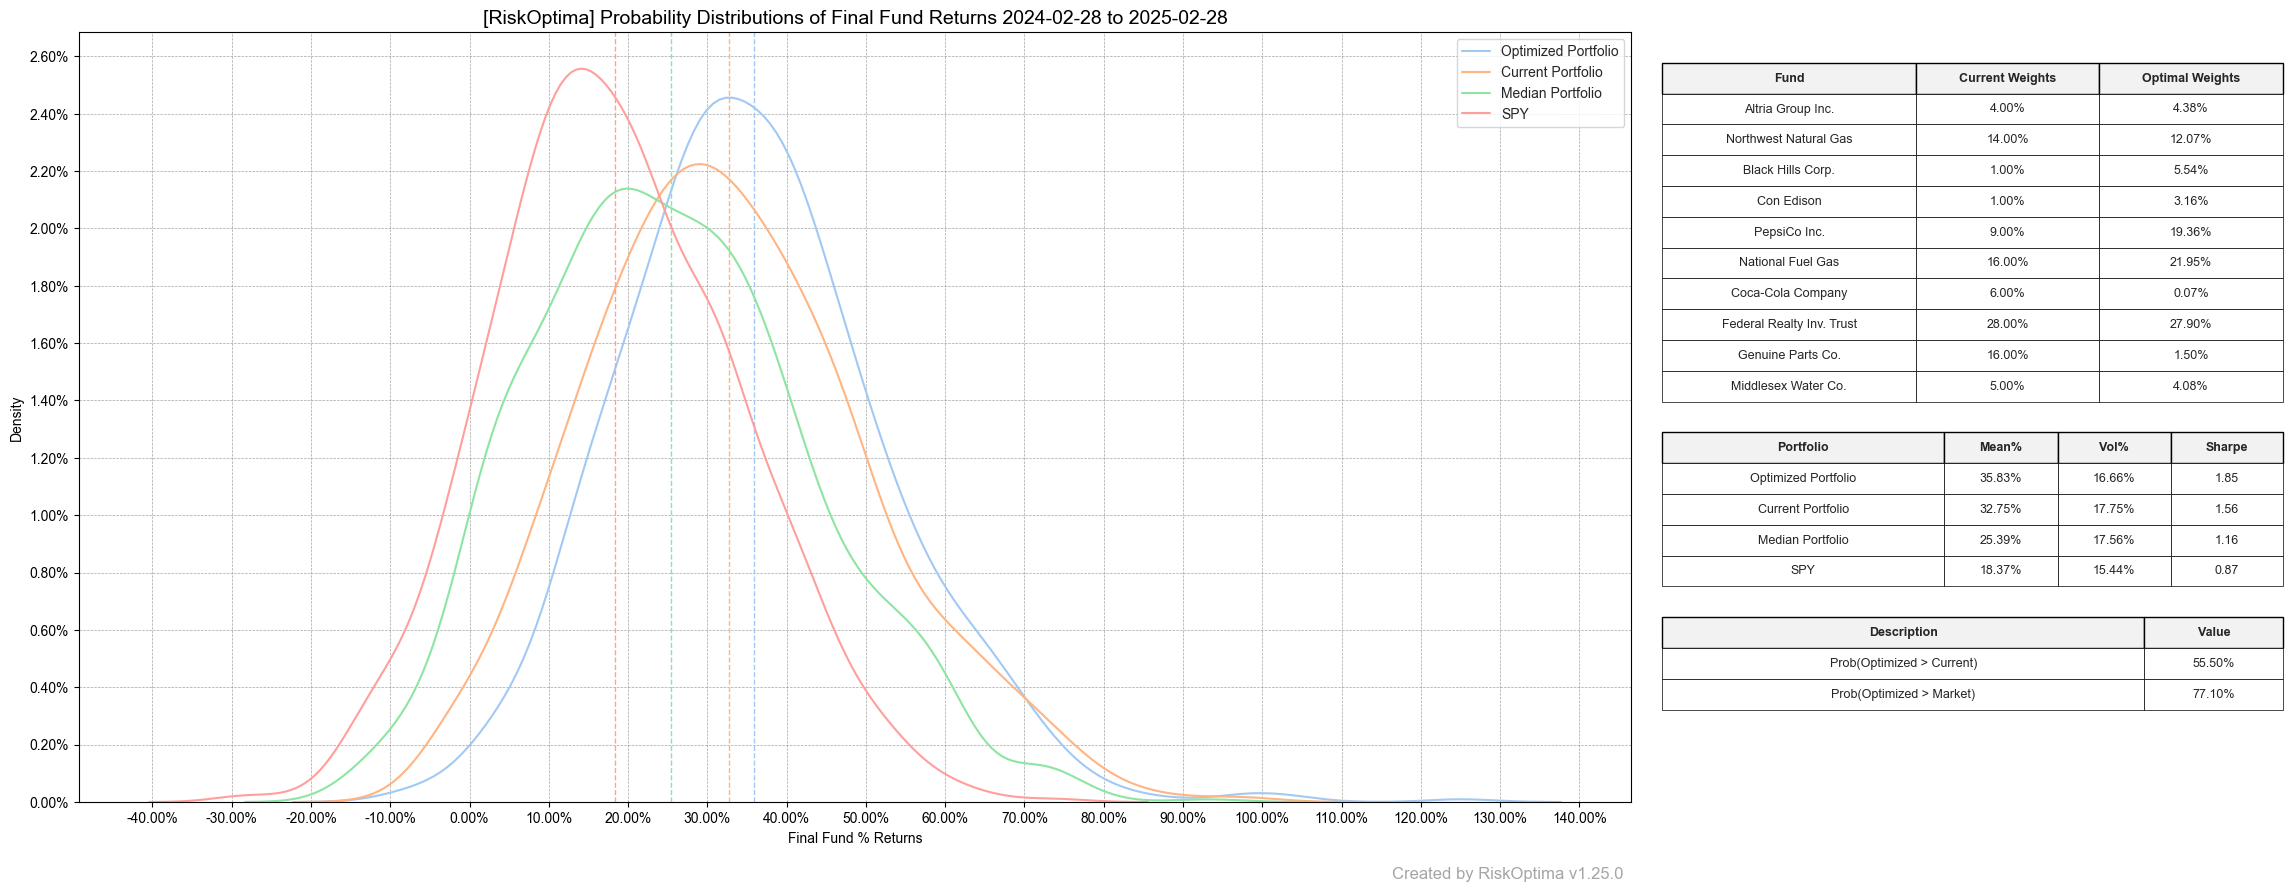

In [11]:
RiskOptima.run_portfolio_probability_analysis(
    asset_table=asset_table,
    analysis_start_date=ANALYSIS_START_DATE,
    analysis_end_date=ANALYSIS_END_DATE,
    benchmark_index=BENCHMARK_INDEX,
    risk_free_rate=RISK_FREE_RATE,
    number_of_portfolio_weights=NUMBER_OF_WEIGHTS,
    trading_days_per_year=RiskOptima.get_trading_days(),
    number_of_monte_carlo_runs=NUMBER_OF_MC_RUNS
)